Missing values per column:
Usage Date         0
User ID            0
AI Tool            0
Usage Frequency    0
Industry           0
Age                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Usage Date       10 non-null     datetime64[ns]
 1   User ID          10 non-null     int64         
 2   AI Tool          10 non-null     object        
 3   Usage Frequency  10 non-null     int64         
 4   Industry         10 non-null     object        
 5   Age              10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 612.0+ bytes


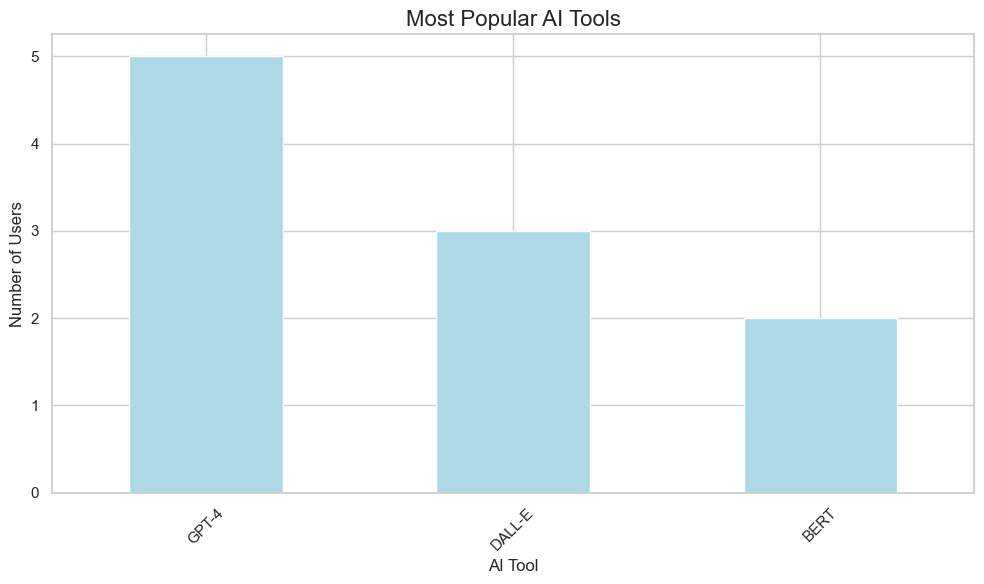

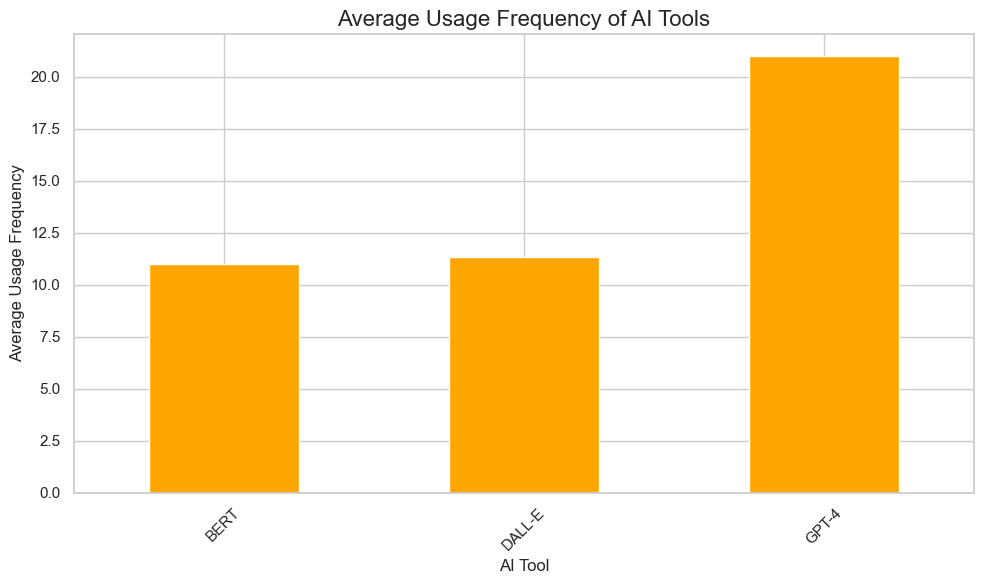

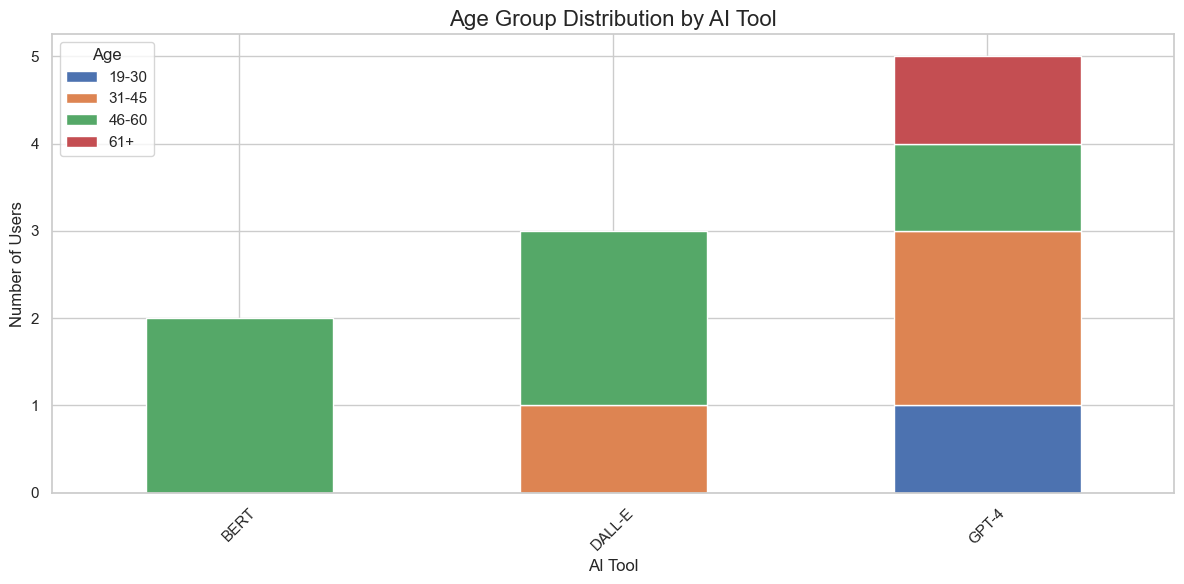

In [1]:
# ai_tools_usage_analysis.ipynb

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Step 2: Load the Dataset
file_path = 'ai_tools_usage_data.csv'  # Make sure the file is in the correct directory
data = pd.read_csv(file_path)

# Preview the data
data.head()

# Step 3: Clean the Data
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Convert 'Usage Date' to datetime
data['Usage Date'] = pd.to_datetime(data['Usage Date'])

# Ensure numerical columns are of correct types
data['Usage Frequency'] = pd.to_numeric(data['Usage Frequency'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Display cleaned data info
data.info()

# Step 4: Analyze Most Popular AI Tools
tool_counts = data['AI Tool'].value_counts()

# Plot most popular AI tools
plt.figure(figsize=(10, 6))
tool_counts.plot(kind='bar', color='lightblue')
plt.title("Most Popular AI Tools", fontsize=16)
plt.ylabel("Number of Users", fontsize=12)
plt.xlabel("AI Tool", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Visualize Average Usage Frequency of AI Tools
avg_usage_frequency = data.groupby('AI Tool')['Usage Frequency'].mean()

# Plot average usage frequency by AI tool
plt.figure(figsize=(10, 6))
avg_usage_frequency.plot(kind='bar', color='orange')
plt.title("Average Usage Frequency of AI Tools", fontsize=16)
plt.ylabel("Average Usage Frequency", fontsize=12)
plt.xlabel("AI Tool", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Identify the Most Common User Demographics for Each AI Tool
age_groups = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Group by AI tool and age group
age_group_distribution = pd.crosstab(data['AI Tool'], age_groups)

# Plot the distribution of age groups for each AI tool
age_group_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution by AI Tool", fontsize=16)
plt.ylabel("Number of Users", fontsize=12)
plt.xlabel("AI Tool", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
